# Adam Trentowski - 162602 - Machine Learning
## lab_05/02
## Library Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import colorConverter, ListedColormap

sns.set_style('darkgrid')
np.random.seed(seed=1)

## Generating data

In [4]:
nb_of_samples_per_class = 20
red_mean = (-1., 0.)
blue_mean = (1., 0.)

x_red = np.random.randn(nb_of_samples_per_class, 2) + red_mean
x_blue = np.random.randn(nb_of_samples_per_class, 2) + blue_mean

X = np.vstack((x_red, x_blue))
t = np.vstack((np.zeros((nb_of_samples_per_class, 1)), 
               np.ones((nb_of_samples_per_class, 1))))

## Class distribution visualization

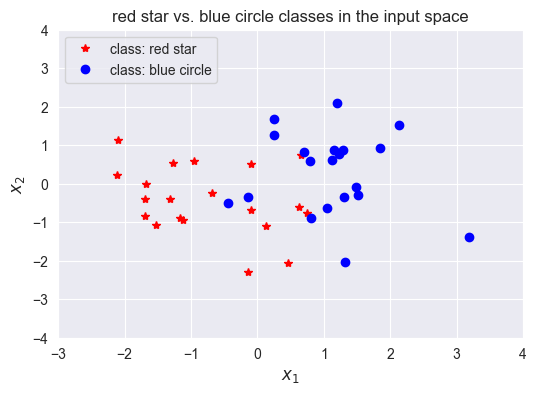

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(x_red[:, 0], x_red[:, 1], 'r*', label='class: red star')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='class: blue circle')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.axis([-3, 4, -4, 4])
plt.title('red star vs. blue circle classes in the input space')
plt.show()

## Logistic function definition

In [6]:
def logistic(z):
    return 1. / (1 + np.exp(-z))

## Neural network function definition

In [7]:
def nn(x, w):
    return logistic(x.dot(w.T))

## Neural network prediction function definition

In [8]:
def nn_predict(x, w):
    return np.around(nn(x, w))

## Loss function definition

In [9]:
def loss(y, t):
    return - np.mean(np.multiply(t, np.log(y)) + np.multiply((1 - t), np.log(1 - y)))

## Visualization of the surface of the loss function (of weights w1 and w2)

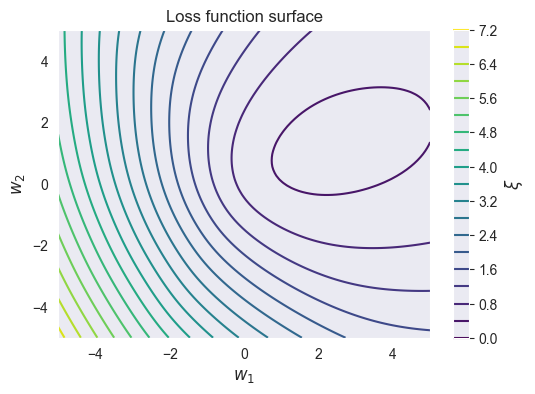

In [17]:
nb_of_ws = 100
wsa = np.linspace(-5, 5, num=nb_of_ws) 
wsb = np.linspace(-5, 5, num=nb_of_ws)
ws_x, ws_y = np.meshgrid(wsa, wsb)
loss_ws = np.zeros((nb_of_ws, nb_of_ws))

for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        loss_ws[i, j] = loss(nn(X, np.asmatrix([ws_x[i, j], ws_y[i, j]])), t)

plt.figure(figsize=(6, 4))
plt.contour(ws_x, ws_y, loss_ws, 20, cmap=mpl.colormaps['viridis'])
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\xi$', fontsize=12)
plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title('Loss function surface')
plt.grid()
plt.show()

## Gradient function definition

In [18]:
def gradient(w, x, t):
    return (nn(x, w) - t).T * x

## Delta_w function

In [19]:
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t)

## Gradient descent updates
# #1

In [20]:
w = np.asmatrix([[-4, -2]])
learning_rate = 0.05

nb_of_iterations = 10
w_iter = [w]

for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate)
    w = w - dw
    w_iter.append(w)

## Visualization: gradient descent updates on loss surface

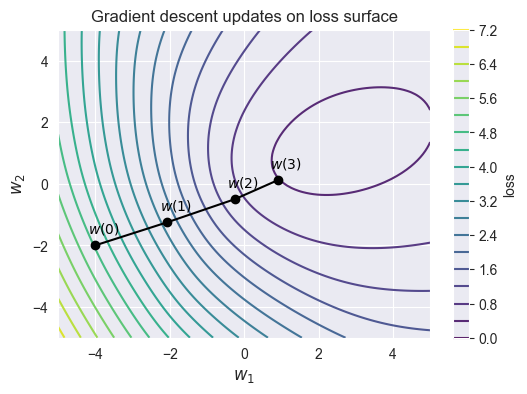

In [23]:
plt.figure(figsize=(6, 4))
plt.contour(ws_x, ws_y, loss_ws, 20, alpha=0.9, cmap=mpl.colormaps['viridis'])
cbar = plt.colorbar()
cbar.ax.set_ylabel('loss')

for i in range(1, 4):
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    plt.plot(w1[0, 0], w1[0, 1], 'ko')
    plt.plot([w1[0, 0], w2[0, 0]], [w1[0, 1], w2[0, 1]], 'k-')
    plt.text(w1[0, 0] - 0.2, w1[0, 1] + 0.4, f'$w({i-1})$', color='k')

w1 = w_iter[3]
plt.plot(w1[0, 0], w1[0, 1], 'ko')
plt.text(w1[0, 0] - 0.2, w1[0, 1] + 0.4, f'$w({i})$', color='k')

plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title('Gradient descent updates on loss surface')
plt.show()

## Visualization: trained NN logistic regression classificator 

C:\Users\Adam\AppData\Local\Temp\ipykernel_35304\587542636.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classification_plane[i, j] = nn_predict(


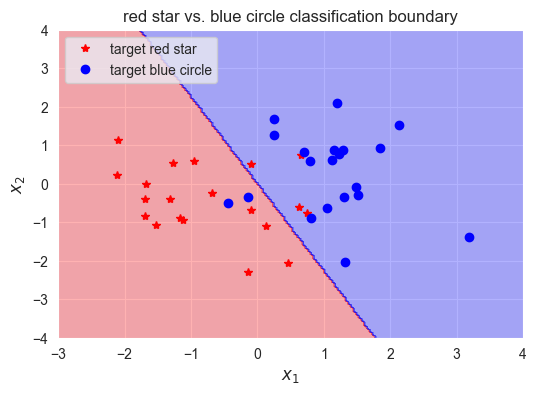

In [24]:
plt.figure(figsize=(6, 4))

nb_of_xs = 200
xsa = np.linspace(-4, 4, num=nb_of_xs)
xsb = np.linspace(-4, 4, num=nb_of_xs)
xx, yy = np.meshgrid(xsa, xsb)

classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i, j] = nn_predict(
            np.asmatrix([[xx[i, j], yy[i, j]]]), w)

cmap = ListedColormap([
    colorConverter.to_rgba('r', alpha=0.3),
    colorConverter.to_rgba('b', alpha=0.3)])

plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.plot(x_red[:, 0], x_red[:, 1], 'r*', label='target red star')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='target blue circle')
plt.legend(loc=2)

plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('red star vs. blue circle classification boundary')
plt.axis([-3, 4, -4, 4])
plt.show()

# #2

In [29]:
w = np.asmatrix([[-4, -2]])
learning_rate = 0.1

nb_of_iterations = 15
w_iter = [w]

for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate)
    w = w - dw
    w_iter.append(w)

## Visualization: gradient descent updates on loss Surface

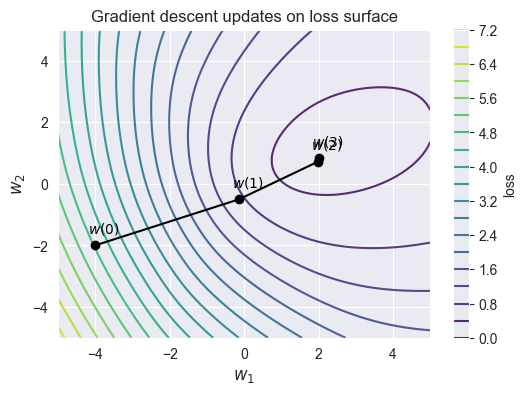

In [30]:
plt.figure(figsize=(6, 4))
plt.contour(ws_x, ws_y, loss_ws, 20, alpha=0.9, cmap=mpl.colormaps['viridis'])
cbar = plt.colorbar()
cbar.ax.set_ylabel('loss')

for i in range(1, 4):
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    plt.plot(w1[0, 0], w1[0, 1], 'ko')
    plt.plot([w1[0, 0], w2[0, 0]], [w1[0, 1], w2[0, 1]], 'k-')
    plt.text(w1[0, 0] - 0.2, w1[0, 1] + 0.4, f'$w({i-1})$', color='k')

w1 = w_iter[3]
plt.plot(w1[0, 0], w1[0, 1], 'ko')
plt.text(w1[0, 0] - 0.2, w1[0, 1] + 0.4, f'$w({i})$', color='k')

plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title('Gradient descent updates on loss surface')
plt.show()

## Visualization: trained NN logistic regression classificator

C:\Users\Adam\AppData\Local\Temp\ipykernel_35304\587542636.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classification_plane[i, j] = nn_predict(


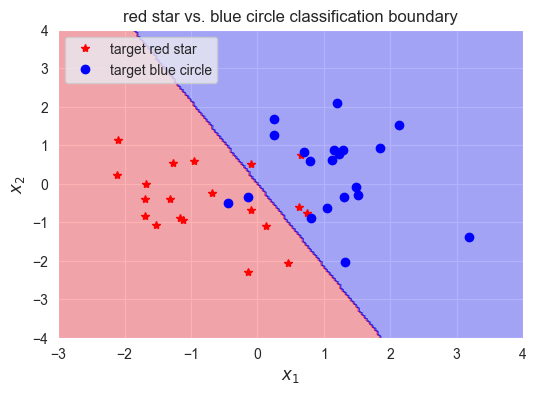

In [31]:
plt.figure(figsize=(6, 4))

nb_of_xs = 200
xsa = np.linspace(-4, 4, num=nb_of_xs)
xsb = np.linspace(-4, 4, num=nb_of_xs)
xx, yy = np.meshgrid(xsa, xsb)

classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i, j] = nn_predict(
            np.asmatrix([[xx[i, j], yy[i, j]]]), w)

cmap = ListedColormap([
    colorConverter.to_rgba('r', alpha=0.3),
    colorConverter.to_rgba('b', alpha=0.3)])

plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.plot(x_red[:, 0], x_red[:, 1], 'r*', label='target red star')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='target blue circle')
plt.legend(loc=2)

plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('red star vs. blue circle classification boundary')
plt.axis([-3, 4, -4, 4])
plt.show()

# #3

In [62]:
w = np.asmatrix([[-4, -2]])
learning_rate = 0.2

nb_of_iterations = 6
w_iter = [w]

for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate)
    w = w - dw
    w_iter.append(w)

## Visualization: gradient descent updates on loss Surface

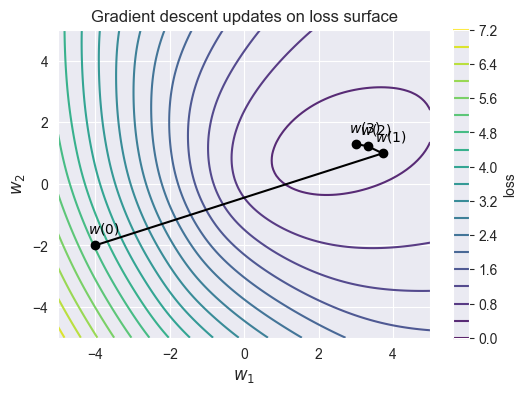

In [63]:
plt.figure(figsize=(6, 4))
plt.contour(ws_x, ws_y, loss_ws, 20, alpha=0.9, cmap=mpl.colormaps['viridis'])
cbar = plt.colorbar()
cbar.ax.set_ylabel('loss')

for i in range(1, 4):
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    plt.plot(w1[0, 0], w1[0, 1], 'ko')
    plt.plot([w1[0, 0], w2[0, 0]], [w1[0, 1], w2[0, 1]], 'k-')
    plt.text(w1[0, 0] - 0.2, w1[0, 1] + 0.4, f'$w({i-1})$', color='k')

w1 = w_iter[3]
plt.plot(w1[0, 0], w1[0, 1], 'ko')
plt.text(w1[0, 0] - 0.2, w1[0, 1] + 0.4, f'$w({i})$', color='k')

plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title('Gradient descent updates on loss surface')
plt.show()

## Visualization: trained NN logistic regression classificator

C:\Users\Adam\AppData\Local\Temp\ipykernel_35304\587542636.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classification_plane[i, j] = nn_predict(


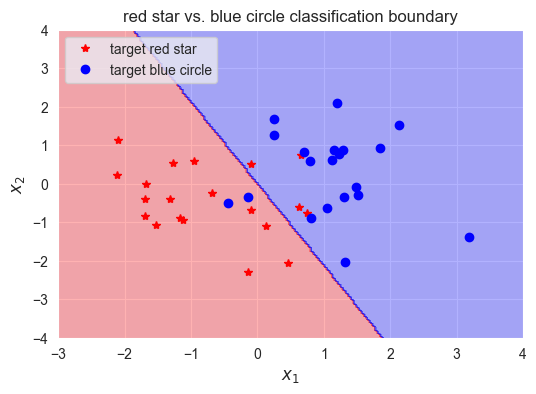

In [64]:
plt.figure(figsize=(6, 4))

nb_of_xs = 200
xsa = np.linspace(-4, 4, num=nb_of_xs)
xsb = np.linspace(-4, 4, num=nb_of_xs)
xx, yy = np.meshgrid(xsa, xsb)

classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i, j] = nn_predict(
            np.asmatrix([[xx[i, j], yy[i, j]]]), w)

cmap = ListedColormap([
    colorConverter.to_rgba('r', alpha=0.3),
    colorConverter.to_rgba('b', alpha=0.3)])

plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.plot(x_red[:, 0], x_red[:, 1], 'r*', label='target red star')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='target blue circle')
plt.legend(loc=2)

plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('red star vs. blue circle classification boundary')
plt.axis([-3, 4, -4, 4])
plt.show()